In [1]:
from ultralytics import YOLO
import os
from utils import plot_BB_center, plot_BB

def grading(model, image_directory, output_directory):
    for filename in os.listdir(image_directory):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            results = model.predict(os.path.join(image_directory, filename), save=True, stream=True)
            txt_filename = os.path.join(output_directory, os.path.splitext(filename)[0] + '.txt')
            
            # Check if results have any detections
            detections = False
            for result in results:
                if len(result.boxes) > 0:
                    detections = True
                    result.save_txt(txt_filename)
                    break
            
            # If no detections, create an empty txt file => lỗi 1 mình đã phát hiện ra 
            if not detections:
                with open(txt_filename, 'w') as f:
                    f.write('')

In [13]:
def grading_v2(model, image_directory, output_directory):
    for filename in os.listdir(image_directory):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            results = model.predict(os.path.join(image_directory, filename), save=True, stream=True)

            txt_filename = os.path.join(output_directory, os.path.splitext(filename)[0] + '.txt')

            # Check if results have any detections
            detections = False
            with open(txt_filename, 'w') as f:
                for result in results:
                    if len(result.boxes) > 0:
                        detections = True
                        boxes = result.boxes  
                        conf_scores = boxes.conf
                        classes = boxes.cls
                        w_orig, h_orig = result.orig_shape
                        print("width img:", w_orig)
                        print("h img:", h_orig)
                        for i in range(len(boxes)):
                            x1, y1, x2, y2 = boxes[i].xyxy[0].cpu().numpy().astype(int)
                            print("Original res not scaled:", x1, y1, x2, y2)
                            cls = int(classes[i])
                            x1_norm = x1 / h_orig
                            x2_norm = x2 / h_orig
                            y1_norm = y1 / w_orig
                            y2_norm = y2 / w_orig
                            f.write(f"{cls} {x1_norm:.4f} {y1_norm:.4f} {x2_norm:.4f} {y2_norm:.4f} {conf_scores[i]:.4f}\n")


                # Empty file if no detections (consistency with previous behavior)
                if not detections:
                    f.write('')

In [11]:
model = YOLO("model_path/Yolov5m_Colab_18_05_2024_889_v3_Sone/train10/weights/best.pt")

# # IMPORTANT: do not delete => this is a bug model can't inference any multiplicative images
# model1 = YOLO("model_path/YOLOv8_Colab_30_04_2024_v2_Ha/weights/best.pt")

image_directory = 'FINAL_test/images'
output_directory = 'FINAL_test/labels/predict/LTRB'
os.makedirs(output_directory, exist_ok=True)

In [14]:
grading_v2(model, image_directory, output_directory)


image 1/1 d:\Documents\GitHub\NomOCR\FINAL_test\images\nlvnpf-0137-01-045.jpg: 896x1280 224 nom_chars, 4716.5ms
width img: 623
h img: 900
Original res not scaled: 494 322 526 347
Original res not scaled: 207 476 241 505
Original res not scaled: 255 346 289 374
Original res not scaled: 682 139 715 166
Original res not scaled: 492 397 525 427
Original res not scaled: 778 139 810 168
Original res not scaled: 730 296 763 325
Original res not scaled: 254 192 287 218
Original res not scaled: 731 426 763 455
Original res not scaled: 777 271 809 296
Original res not scaled: 730 219 761 246
Original res not scaled: 208 349 239 375
Original res not scaled: 159 271 190 297
Original res not scaled: 255 112 287 139
Original res not scaled: 540 529 572 556
Original res not scaled: 682 112 715 139
Original res not scaled: 208 109 239 139
Original res not scaled: 399 425 432 453
Original res not scaled: 399 556 432 584
Original res not scaled: 540 451 573 476
Original res not scaled: 208 217 240 244


FINAL_test/images\nlvnpf-0137-01-045.jpg


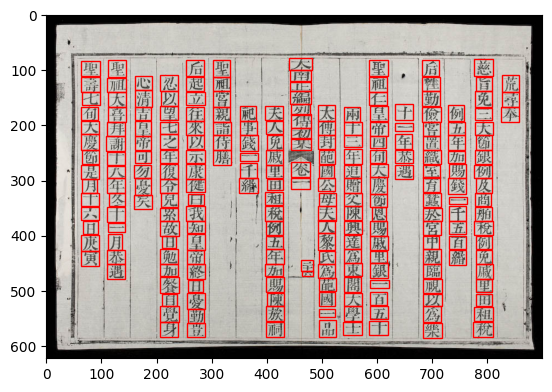

FINAL_test/images\nlvnpf-0137-01-046.jpg


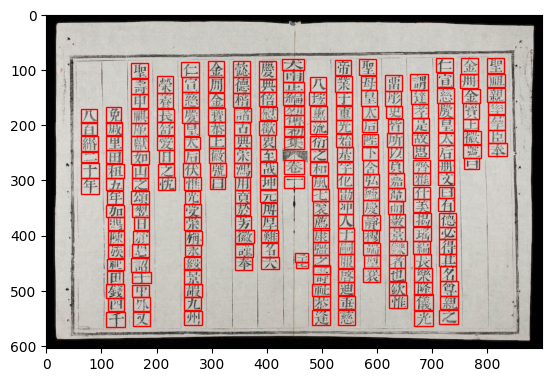

FINAL_test/images\nlvnpf-0137-01-047.jpg


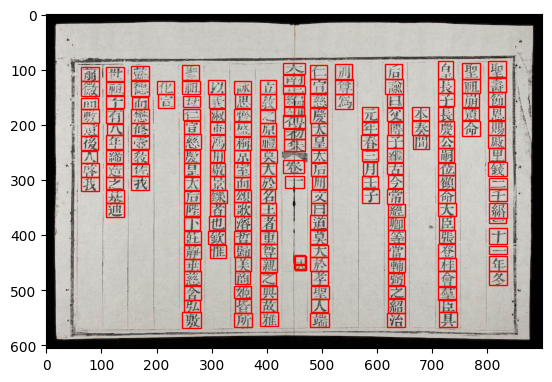

FINAL_test/images\nlvnpf-0137-01-048.jpg


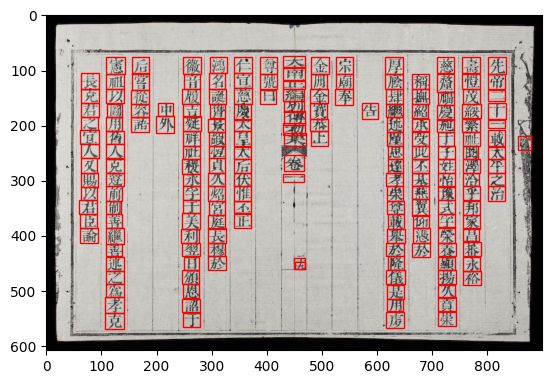

FINAL_test/images\nlvnpf-0137-01-049.jpg


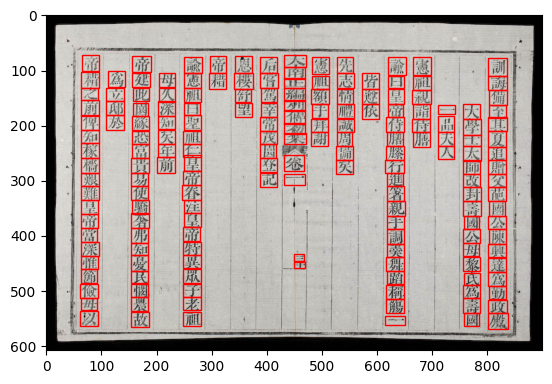

FINAL_test/images\nlvnpf-0137-01-050.jpg


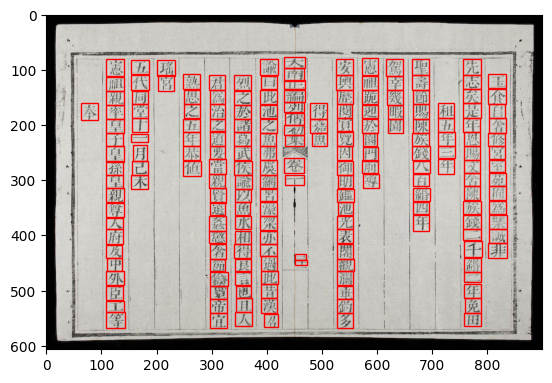

FINAL_test/images\nlvnpf-0140-01-016.jpg


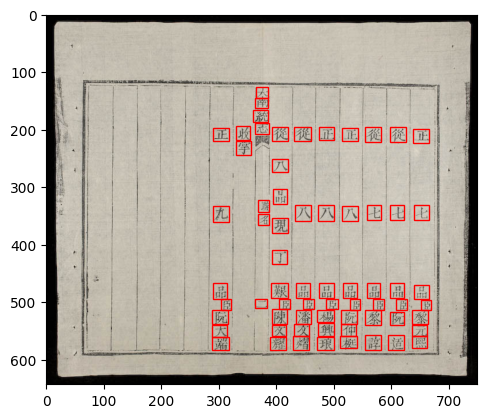

FINAL_test/images\nlvnpf-0140-01-017.jpg


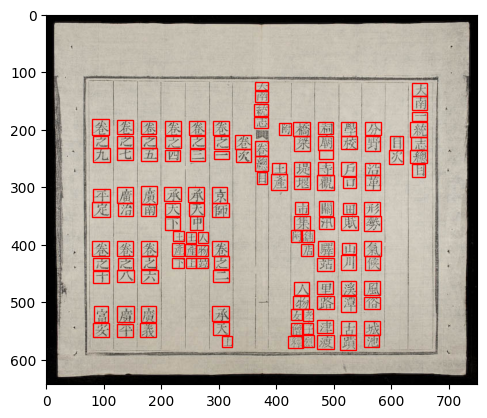

FINAL_test/images\nlvnpf-0174-03-013.jpg


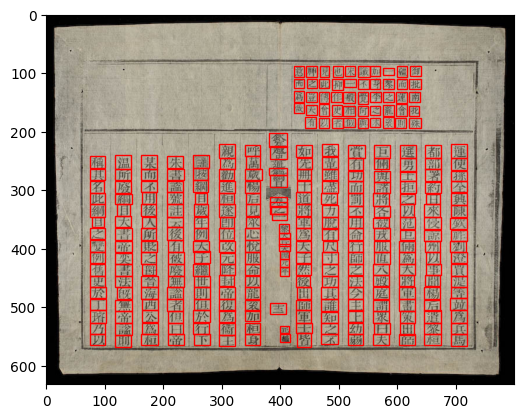

FINAL_test/images\nlvnpf-0174-03-014.jpg


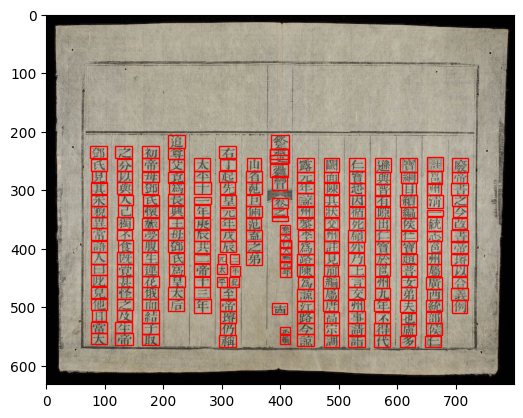

In [15]:
# Plotting predicted bounding boxes with trained models on images
for filename in os.listdir(image_directory):
    img_pth = os.path.join(image_directory, filename)
    print(img_pth)
    coord_path = os.path.join(output_directory, os.path.splitext(filename)[0] + '.txt')
    plot_BB(img_pth, coord_path)

In [8]:
from utils import convert_coord

convert_coord("FINAL_test/labels/ground_truth/CCWH/", "FINAL_test/labels/ground_truth/LTRB/")
convert_coord("FINAL_test/labels/predict/CCWH/", "FINAL_test/labels/predict/LTRB/")


image 1/1 d:\Documents\GitHub\NomOCR\FINAL_test\images\nlvnpf-0137-01-048.jpg: 896x1280 187 nom_chars, 9487.0ms
Speed: 44.0ms preprocess, 9487.0ms inference, 3247.0ms postprocess per image at shape (1, 3, 896, 1280)
608
900


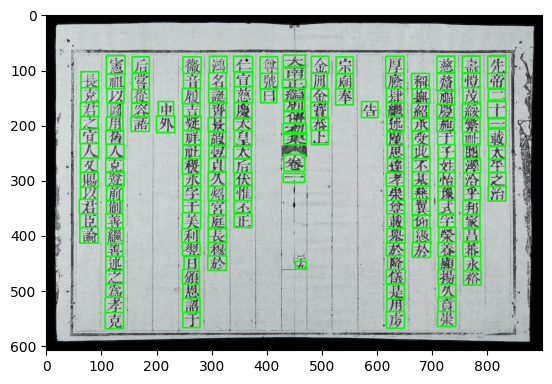

In [4]:
import cv2
import matplotlib.pyplot as plt
# Checking with a random image when it is rotated.
img = cv2.imread("FINAL_test/images/nlvnpf-0137-01-048.jpg")
def rotate_image(image, angle):
    height = image.shape[0]
    width = image.shape[1]
    center = (width/2, height/2)
    size = (width, height)
    rot_mat = cv2.getRotationMatrix2D(center, angle, 1.0)
    res = cv2.warpAffine(image, rot_mat, size)
    return res
    
img_gray_rotated = rotate_image(img, 45)

results = model.predict("FINAL_test/images/nlvnpf-0137-01-048.jpg")
for result in results:
    boxes = result.boxes  
    conf_scores = boxes.conf
    w, h = result.orig_shape
    for i in range(len(boxes)):
        if(conf_scores[i] > 0.7):
            x1, y1, x2, y2 = boxes[i].xyxy[0].cpu().numpy().astype(int)
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2) 
    plt.imshow(img)

print(w)
print(h)